In [18]:
import matplotlib.pyplot as mtp  
import pandas as pd 
import numpy as nm

In [54]:
data_set= pd.read_csv('/content/Social_Network_Ads.csv')  
data_set.iloc[200:400]

User ID  Gender  Age  EstimatedSalary  Purchased
200  15628523    Male   35            39000          0
201  15708196    Male   49            74000          0
202  15735549  Female   39           134000          1
203  15809347  Female   41            71000          0
204  15660866  Female   58           101000          1
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[200 rows x 5 columns]

In [ ]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values 
x

In [21]:
    # Splitting the dataset into training and test set.  
    from sklearn.model_selection import train_test_split  
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [22]:
    #feature Scaling  
    from sklearn.preprocessing import StandardScaler    
    st_x= StandardScaler()    
    x_train= st_x.fit_transform(x_train)    
    x_test= st_x.transform(x_test)  

In [23]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred[202]
y_test[202]

IndexError: ignored

In [25]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix
cm

<function sklearn.metrics._classification.confusion_matrix>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


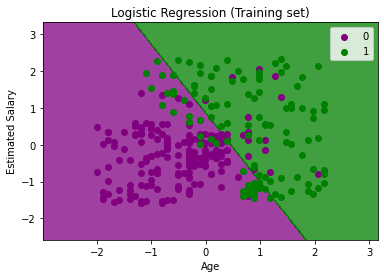

In [26]:
    #Visualizing the training set result  
    from matplotlib.colors import ListedColormap  
    x_set, y_set = x_train, y_train  
    x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
    mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
    alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
    mtp.xlim(x1.min(), x1.max())  
    mtp.ylim(x2.min(), x2.max())  
    for i, j in enumerate(nm.unique(y_set)):  
        mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
            c = ListedColormap(('purple', 'green'))(i), label = j)  
    mtp.title('Logistic Regression (Training set)')  
    mtp.xlabel('Age')  
    mtp.ylabel('Estimated Salary')  
    mtp.legend()  
    mtp.show()  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


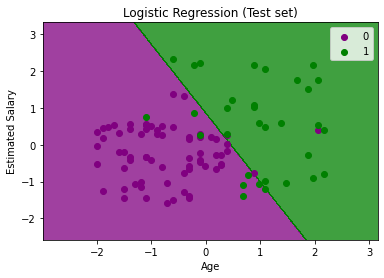

In [33]:
    #Visulaizing the test set result  
    from matplotlib.colors import ListedColormap  
    x_set, y_set = x_test, y_test  
    x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
    mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
    alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
    mtp.xlim(x1.min(), x1.max())  
    mtp.ylim(x2.min(), x2.max())  
    for i, j in enumerate(nm.unique(y_set)):  
        mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
            c = ListedColormap(('purple', 'green'))(i), label = j)  
    mtp.title('Logistic Regression (Test set)')  
    mtp.xlabel('Age')  
    mtp.ylabel('Estimated Salary')  
    mtp.legend()  
    mtp.show()  